In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,cross_val_score,KFold,GridSearchCV
from sklearn.metrics import classification_report,RocCurveDisplay
from sklearn.ensemble import AdaBoostClassifier


In [5]:
df =pd.read_csv("heart.csv")

In [6]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [7]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
X = df.iloc[:,:-1]
y = df["target"]
X_train , X_test , y_train ,y_test = train_test_split(X , y, test_size=0.2 , random_state = 42)

In [10]:
model = AdaBoostClassifier()

In [11]:
param_grid = {
    'n_estimators': [50, 100, 150],  
    'learning_rate': [0.01, 0.1, 1.0]  
}

In [15]:
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)


In [16]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(),
             param_grid={'learning_rate': [0.01, 0.1, 1.0],
                         'n_estimators': [50, 100, 150]})

In [17]:
best_model = grid_search.best_estimator_

In [18]:
y_pred = best_model.predict(X_test)

In [19]:
report = classification_report(y_test, y_pred)

In [21]:
print(report)

              precision    recall  f1-score   support

           0       0.83      0.86      0.85        29
           1       0.87      0.84      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



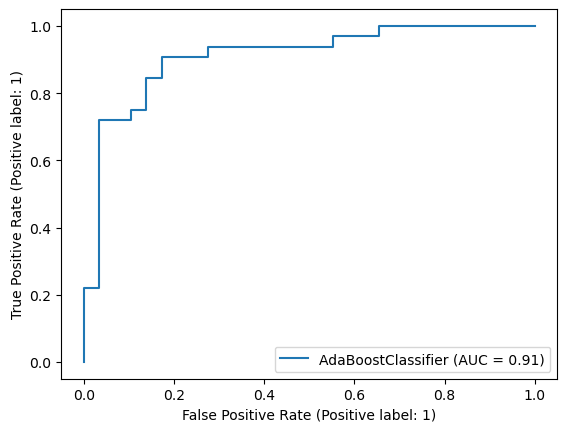

In [25]:
disp= RocCurveDisplay.from_estimator(best_model,X_test,y_test)


In [26]:
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

In [28]:
cv_scores = cross_val_score(model, X, y, cv=kfold)

In [29]:
print("Average Cross-Validation Score:", cv_scores.mean())

Average Cross-Validation Score: 0.7953005464480875
